In [53]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import fnmatch
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from sklearn.manifold import TSNE
import json

In [54]:
path = 'D:\\PhD\\data\\test-audio'

files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d .wav files in %s"%(len(files),path))

found 6604 .wav files in D:\PhD\data\test-audio


In [55]:
def get_features(y, sr):
    y = y[0:sr]  # analyze just first second
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfcc, mode='nearest')
    delta2_mfcc = librosa.feature.delta(mfcc, order=2, mode='nearest')
    feature_vector = np.concatenate((np.mean(mfcc,1), np.mean(delta_mfcc,1), np.mean(delta2_mfcc,1)))
    feature_vector = (feature_vector-np.mean(feature_vector)) / np.std(feature_vector)
    return feature_vector

In [56]:
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    if i % 100 == 0:
        print("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f)
        if len(y) < 2:
            print("error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except:
        print("error loading %s" % f)
        
print("calculated %d feature vectors"%len(feature_vectors))

get 1 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_30.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00158691  0.0038147   0.00732422 ... -0.00939941 -0.00640869
 -0.00552368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00598145 0.00750732 0.01095581 ... 0.00402832 0.00640869 0.00534058] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00250244 0.00268555 0.00146484 ... 0.00177002 0.00097656 0.00216675] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipyk

get 101 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB1.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00930786 -0.01171875 -0.01019287 ... -0.01306152 -0.01745605
 -0.02102661] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.1481018  -0.12472534 -0.09793091 ... -0.05551147 -0.03173828
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.05493164 -0.04922485 -0.034729   ...  0.02508545  0.0340271
  0.03591919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 201 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB16.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00411987 -0.00283813 -0.00357056 ... -0.00115967  0.00112915
  0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00964355  0.01190186  0.00961304 ...  0.00537109 -0.00018311
 -0.00231934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00015259  0.00970459  0.01190186 ... -0.00341797 -0.00244141
 -0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 301 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB22.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 5.1879883e-04 -3.0517578e-05  8.8500977e-04 ...  4.1198730e-03
  1.6479492e-03 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00271606 -0.00396729 -0.00500488 ... -0.00244141 -0.00637817
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00100708  0.00561523 -0.01544189 ...  0.06488037  0.04003906
  0.03219604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 401 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB29.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.03610229 -0.02954102 -0.01867676 ... -0.0057373  -0.00622559
 -0.00543213] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00054932  0.00192261  0.00488281 ...  0.006073    0.00427246
  0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.01071167 -0.00665283 -0.00128174 ... -0.01586914 -0.04196167
 -0.03314209] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 501 of 6604 = D:\PhD\data\test-audio\anthrophony\chunkaudio_segment_dryB7.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00131226 -0.00079346 -0.0007019  ... -0.00283813  0.00634766
 -0.00341797] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00183105 -0.00372314 -0.0072937  ...  0.00665283  0.0093689
  0.00271606] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00689697 -0.00460815  0.01156616 ...  0.00189209  0.00167847
  0.00466919] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_101.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0010376  -0.00360107 -0.00582886 ... -0.00061035  0.00097656
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00201416 -0.00149536 -0.00457764 ...  0.00323486  0.00021362
 -0.0017395 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00143433 -0.00299072 -0.00228882 ... -0.00054932 -0.00097656
  0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_109.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.02905273  0.02905273  0.01028442 ... -0.01016235 -0.00878906
 -0.00598145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00271606 -0.00640869 -0.00857544 ... -0.00411987 -0.00305176
  0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00054932 0.01293945 0.01376343 ... 0.00439453 0.00561523 0.00088501] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_115.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00509644 -0.00717163  0.00079346 ... -0.00466919  0.02856445
  0.02337646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00650024  0.0112915   0.00048828 ...  0.09356689  0.06176758
 -0.01950073] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-4.0588379e-03 -5.4931641e-04 -3.5095215e-03 ...  5.3405762e-03
 -9.1552734e-05 -4.5471191e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_14.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 4.6997070e-03  1.0009766e-02  9.7961426e-03 ... -3.0517578e-05
 -6.7138672e-04 -1.2817383e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.02178955 -0.00924683 -0.00125122 ... -0.00494385 -0.00350952
 -0.00494385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0043335   0.00241089 -0.00067139 ...  0.00979614  0.0098877
  0.00402832] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users

get 1001 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_20.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00177002  0.00302124  0.00134277 ... -0.00125122  0.00128174
  0.00268555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00253296 -0.00320435 -0.00531006 ...  0.00140381  0.00637817
  0.00619507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00332642 -0.0015564  -0.00198364 ...  0.00311279  0.00369263
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1101 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_27.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00146484 -0.00302124 -0.00247192 ... -0.0015564  -0.00265503
 -0.00445557] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00030518  0.00186157  0.00216675 ... -0.00518799 -0.00170898
 -0.00509644] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00756836 -0.01025391 -0.01321411 ... -0.0015564  -0.00085449
 -0.00170898] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1201 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_33.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00015259 -0.00308228 -0.00396729 ... -0.00338745 -0.00216675
 -0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00216675 -0.00366211 -0.00997925 ... -0.00247192 -0.00109863
 -0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0020752  -0.00210571 -0.00186157 ...  0.00036621 -0.00024414
 -0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1301 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_4.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00231934 -0.00119019  0.00064087 ...  0.00738525  0.00350952
 -0.00390625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01470947  0.00393677 -0.00164795 ...  0.01461792  0.01956177
  0.01361084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00665283 -0.00247192 -0.00085449 ... -0.01043701 -0.00579834
 -0.00378418] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1401 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_47.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 2.1057129e-03 -1.5258789e-04  6.1035156e-05 ... -2.8991699e-03
 -3.5095215e-03 -4.4860840e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00094604  0.00021362 -0.00045776 ...  0.0015564   0.00326538
  0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00167847 -0.0017395  -0.00323486 ...  0.00085449  0.00106812
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 1501 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_53.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00308228 -0.00189209 -0.0032959  ... -0.00085449 -0.00018311
 -0.00210571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00341797 0.0083313  0.00592041 ... 0.00991821 0.00613403 0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00790405 -0.01370239 -0.01358032 ... -0.02984619 -0.02252197
 -0.01113892] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 1601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_6.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00534058  0.00500488  0.00265503 ...  0.01852417 -0.00036621
 -0.01901245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0043335  -0.00588989 -0.00460815 ... -0.00369263 -0.00305176
  0.00048828] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0085144  -0.0093689  -0.01119995 ...  0.01428223 -0.08450317
 -0.10662842] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_66.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01495361 -0.00924683 -0.03274536 ...  0.04858398  0.06240845
  0.05834961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00280762 -0.01068115 -0.00500488 ...  0.01586914  0.00854492
  0.01004028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00558472  0.00817871  0.00891113 ... -0.0055542  -0.01895142
 -0.02285767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 1801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_72.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.03314209  0.00488281 -0.02099609 ...  0.01882935 -0.00326538
 -0.01727295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-3.0517578e-05  3.1738281e-03  3.9367676e-03 ...  3.2958984e-03
  1.0528564e-02  6.7443848e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00302124 -0.00292969 -0.00930786 ... -0.00210571  0.00439453
  0.01687622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 1901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_79.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00958252  0.01220703  0.01245117 ...  0.00650024 -0.00112915
 -0.00793457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00024414  0.00280762  0.00335693 ... -0.00445557 -0.00531006
 -0.00338745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00439453 0.00402832 0.00494385 ... 0.00857544 0.00369263 0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 2001 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_85.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00112915 0.00140381 0.00350952 ... 0.00695801 0.01098633 0.01150513] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 9.7656250e-04  7.3852539e-03  6.6528320e-03 ...  6.1035156e-05
 -4.8828125e-04  1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.01168823 -0.01940918 -0.01599121 ...  0.00146484 -0.00030518
 -0.00231934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thoma

get 2101 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_92.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00305176 -0.00369263 -0.00296021 ... -0.0144043  -0.00817871
 -0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.41278076 0.40774536 0.38787842 ... 0.01535034 0.02655029 0.03167725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00115967 -0.00164795 -0.0039978  ... -0.00762939 -0.01104736
 -0.01074219] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 2201 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_99.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.02911377  0.00949097 -0.01470947 ...  0.01898193 -0.0038147
 -0.02279663] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00402832 -0.01254272 -0.01663208 ... -0.00170898 -0.01260376
 -0.02331543] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01464844  0.00823975 -0.00604248 ...  0.05273438  0.03222656
 -0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 2301 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_dryA87.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.03393555  0.04275513  0.02456665 ... -0.02209473 -0.02301025
 -0.01553345] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00616455 -0.01483154 -0.0289917  ...  0.00033569 -0.00228882
 -0.00366211] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0055542   0.00534058  0.00512695 ... -0.02462769 -0.00588989
  0.00717163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2401 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_dryA94.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0340271   0.02044678 -0.00418091 ...  0.01455688  0.01858521
  0.01467896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00012207 -0.00543213 -0.00674438 ... -0.01217651 -0.02096558
 -0.01293945] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00732422 -0.00808716 -0.00787354 ... -0.00216675 -0.00082397
  0.00186157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2501 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA1.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0062561   0.00473022 -0.00247192 ...  0.00146484  0.0017395
  0.00405884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00106812 -0.00054932  0.00241089 ... -0.00189209 -0.0027771
 -0.00164795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00030518 0.00360107 0.00341797 ... 0.00213623 0.00030518 0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp

get 2601 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA16.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 1.0681152e-03  6.1035156e-05 -1.1901855e-03 ... -4.5776367e-04
 -6.6833496e-03 -6.6223145e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00323486  0.00338745  0.00363159 ... -0.00076294 -0.00259399
 -0.00167847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00115967  0.00091553  0.00091553 ...  0.00518799 -0.00021362
 -0.00494385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 2701 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA22.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00027466 -0.00012207 -0.00271606 ... -0.00415039  0.00222778
  0.00497437] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01449585  0.01376343 -0.00015259 ...  0.00430298  0.00192261
 -0.00372314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00146484 -0.00442505 -0.00216675 ...  0.00299072  0.0005188
 -0.00106812] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 2801 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA3.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.02896118 -0.03289795  0.01956177 ... -0.0022583   0.00018311
  0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00241089 -0.00564575 -0.00445557 ...  0.00445557  0.00149536
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00143433  0.00164795 -0.0038147  ... -0.00064087 -0.00170898
 -0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 2901 of 6604 = D:\PhD\data\test-audio\biophony\chunkaudio_segment_wetA9.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00460815 -0.00283813  0.00054932 ... -0.00402832 -0.00393677
 -0.00411987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00473022  0.00335693  0.00393677 ... -0.00411987 -0.00064087
  0.0010376 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00119019 -0.00054932 -0.00115967 ...  0.0012207   0.00027466
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3001 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_108.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00250244 -0.00436401 -0.00442505 ...  0.00021362  0.0015564
  0.00158691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00256348 0.00216675 0.00018311 ... 0.00476074 0.00549316 0.00338745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00079346 -0.00039673  0.00054932 ...  0.00109863 -0.00067139
  0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Tem

get 3101 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_115.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00012207 -0.00125122 -0.00512695 ... -0.00631714 -0.0020752
  0.00067139] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00378418  0.00231934  0.0015564  ...  0.00192261 -0.00057983
  0.00097656] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00024414 -0.00784302  0.00149536 ...  0.00076294  0.00408936
  0.00579834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 3201 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_62.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.02236938  0.03219604  0.0090332  ...  0.02340698 -0.01037598
  0.01266479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00952148 -0.01898193  0.00811768 ...  0.02124023  0.01980591
  0.00756836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.04272461  0.04592896 -0.00689697 ... -0.01412964  0.02511597
 -0.00842285] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3301 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB100.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00152588  0.00064087  0.00393677 ...  0.00262451 -0.00033569
 -0.00546265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 4.2114258e-03  5.4016113e-03 -7.9345703e-04 ... -9.0332031e-03
 -4.4250488e-03  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00021362 -0.00073242  0.00027466 ...  0.00057983  0.00241089
 -0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 3401 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB108.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00015259 -0.00198364  0.01104736 ... -0.00057983  0.0015564
 -0.00384521] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00427246  0.00561523  0.00372314 ... -0.01620483 -0.01089478
 -0.00985718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00558472 -0.01776123 -0.01965332 ...  0.01751709  0.00219727
 -0.00588989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 3501 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB114.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00601196  0.01028442  0.02246094 ... -0.04754639 -0.05554199
 -0.05407715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00167847 -0.00326538  0.00143433 ...  0.00152588  0.00588989
 -0.00482178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.03933716 -0.04052734 -0.04190063 ... -0.00894165 -0.00189209
  0.00836182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3601 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB13.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00750732  0.0451355   0.01818848 ... -0.00485229 -0.00787354
 -0.01382446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.01727295 -0.00979614 -0.00030518 ...  0.00338745  0.00491333
  0.00570679] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.02154541  0.00756836 -0.00076294 ... -0.00598145 -0.00689697
 -0.00335693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3701 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB2.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00558472  0.00228882 -0.00054932 ... -0.00317383 -0.00384521
 -0.00952148] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00210571  0.02453613 -0.00286865 ...  0.00109863 -0.00204468
 -0.00439453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00732422 -0.00390625 -0.01107788 ...  0.01461792  0.00390625
  0.00997925] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 3801 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB26.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0017395  -0.00115967  0.00405884 ...  0.00067139  0.00015259
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-3.8757324e-03 -6.5002441e-03 -3.6926270e-03 ...  2.8381348e-03
 -3.0517578e-05  3.3264160e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00167847 -0.00424194 -0.0078125  ... -0.00613403 -0.00787354
 -0.00628662] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 3901 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB32.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00280762  0.00332642  0.00323486 ... -0.00311279 -0.00228882
 -0.00314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00717163 -0.00537109 -0.00750732 ...  0.00164795 -0.0007019
 -0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.01913452 -0.01831055 -0.01544189 ...  0.00756836  0.00128174
  0.00256348] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 4001 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB39.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.0062561  0.00143433 0.00466919 ... 0.00415039 0.00317383 0.00552368] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00662231 -0.00939941 -0.00213623 ...  0.          0.00430298
  0.00131226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00476074 -0.00250244  0.00085449 ...  0.003479    0.00039673
  0.00604248] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 4101 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB46.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0038147   0.00064087 -0.00045776 ... -0.00189209 -0.00787354
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0062561   0.00704956  0.00534058 ...  0.00250244 -0.00134277
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00866699 -0.00778198 -0.00820923 ...  0.00119019  0.00567627
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4201 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB52.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0062561  -0.02035522 -0.00384521 ... -0.00790405 -0.01119995
 -0.00537109] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-2.3498535e-03  3.0517578e-05  9.1857910e-03 ...  1.1901855e-03
 -1.2176514e-02 -1.3946533e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00415039 0.0078125  0.0015564  ... 0.00384521 0.00393677 0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thoma

get 4301 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB59.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00326538 -0.00473022 -0.00982666 ... -0.00305176  0.00521851
  0.01205444] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00442505  0.00054932  0.00045776 ...  0.00250244 -0.0032959
 -0.0032959 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0015564   0.01022339  0.00765991 ...  0.0007019  -0.00082397
 -0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 4401 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB65.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00488281 -0.00109863 -0.00292969 ...  0.00222778 -0.00265503
 -0.00695801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0072937  -0.0020752   0.00021362 ... -0.00592041 -0.00366211
 -0.00054932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00128174 -0.00366211 -0.00448608 ... -0.00631714 -0.00195312
  0.00045776] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4501 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB71.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0015564   0.00592041  0.01013184 ... -0.00671387 -0.00756836
 -0.00662231] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00643921 -0.01223755 -0.00650024 ... -0.00582886 -0.00991821
 -0.00418091] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00015259 -0.00476074 -0.00241089 ... -0.00680542 -0.00741577
 -0.00265503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4601 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB78.wav7.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00411987 0.00256348 0.00341797 ... 0.00128174 0.         0.00140381] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.02706909  0.02713013  0.0256958  ... -0.01379395 -0.01544189
 -0.01702881] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00640869 -0.00335693  0.00048828 ... -0.00521851  0.00021362
  0.00296021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 4701 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB84.wav9.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01489258  0.00888062 -0.00137329 ...  0.00869751  0.00723267
  0.01168823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01959229  0.01779175  0.01843262 ...  0.00354004 -0.00418091
 -0.01168823] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.01483154  0.01022339 -0.00408936 ... -0.0184021  -0.01239014
 -0.02044678] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4801 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB91.wav1.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00216675 -0.0007019  -0.00405884 ...  0.00216675  0.00067139
 -0.00286865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00167847  0.00460815  0.00973511 ... -0.00881958 -0.00613403
 -0.00967407] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00680542 -0.00268555 -0.00314331 ... -0.00268555 -0.00271606
 -0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 4901 of 6604 = D:\PhD\data\test-audio\geophony\chunkaudio_segment_wetB98.wav11.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00183105 -0.00057983 -0.00079346 ...  0.0145874   0.01040649
  0.00387573] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00061035 0.00619507 0.00741577 ... 0.01034546 0.00527954 0.00619507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.01278687 -0.01452637 -0.01165771 ...  0.00643921  0.00595093
  0.00762939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Te

get 5001 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA102.wav13.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00369263 -0.0027771  -0.00357056 ... -0.00177002  0.00067139
  0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0022583  -0.00048828  0.00119019 ...  0.00198364  0.00369263
  0.00326538] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00061035  0.00109863 -0.00057983 ... -0.00030518  0.00198364
  0.00073242] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5101 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA109.wav3.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00134277  0.00042725 -0.00015259 ... -0.00088501 -0.00195312
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00128174 -0.00137329  0.00106812 ... -0.0055542  -0.0045166
 -0.00338745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00057983  0.00064087 -0.00097656 ...  0.00076294 -0.00076294
 -0.00094604] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5201 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA115.wav5.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-3.0517578e-04  8.8500977e-04  2.2888184e-03 ...  9.1552734e-05
  2.7465820e-04  5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-2.4414062e-03 -4.2724609e-04  2.4414062e-04 ...  4.5776367e-04
  6.7138672e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00167847  0.00091553 -0.00030518 ... -0.0038147  -0.00183105
 -0.00259399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n

get 5301 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA14.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00460815 -0.00265503  0.00027466 ... -0.00085449  0.00149536
  0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00332642 -0.00091553 -0.00039673 ...  0.00140381  0.00128174
  0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00128174 -0.00100708  0.00018311 ...  0.00115967  0.00082397
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5401 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA21.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00149536 -0.00241089  0.00100708 ... -0.00167847 -0.00326538
 -0.00463867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00106812 -0.00131226 -0.00360107 ... -0.00079346 -0.00045776
 -0.00100708] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0039978  -0.00186157 -0.00085449 ... -0.00137329 -0.00247192
 -0.0027771 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5501 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA28.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00360107 -0.00210571 -0.00088501 ...  0.00213623  0.00082397
  0.00119019] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00042725 -0.00344849 -0.00146484 ... -0.00442505 -0.00564575
 -0.00588989] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00326538  0.00057983  0.00296021 ... -0.00183105 -0.00369263
 -0.00344849] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5601 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA34.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00198364  0.00204468  0.00115967 ... -0.00097656 -0.00021362
 -0.0005188 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00280762 -0.00189209 -0.00424194 ... -0.00286865 -0.00146484
 -0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.0007019   0.00189209 -0.00097656 ...  0.00457764  0.00289917
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5701 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA40.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00305176  0.00588989  0.00509644 ...  0.00170898  0.00131226
 -0.00039673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00064087 -0.0010376  -0.0045166  ... -0.00534058 -0.00302124
 -0.00134277] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00250244  0.00186157 -0.0005188  ... -0.00366211 -0.00280762
 -0.00213623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

get 5801 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA47.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00036621  0.00027466 -0.00106812 ... -0.00372314 -0.00454712
 -0.00198364] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00323486 -0.00299072 -0.00363159 ... -0.00167847 -0.0017395
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00271606 -0.00149536 -0.0007019  ...  0.0005188  -0.00283813
 -0.00314331] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 5901 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA53.wav6.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00183105  0.00241089  0.00082397 ... -0.00244141 -0.00289917
 -0.00350952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 1.2512207e-03  6.7138672e-04 -5.1879883e-04 ...  4.8522949e-03
  2.2583008e-03  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00073242 -0.00216675 -0.00238037 ... -0.00119019 -0.00204468
 -0.00247192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 6001 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA6.wav8.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00222778 -0.00198364  0.00054932 ... -0.00140381 -0.00473022
 -0.00491333] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00140381 -0.00146484 -0.00350952 ...  0.00146484  0.00152588
  0.00286865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00149536  0.00302124 -0.00112915 ... -0.0010376  -0.0015564
 -0.00250244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Lo

get 6101 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA67.wav0.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[1.1901855e-03 2.4108887e-03 2.1972656e-03 ... 3.0517578e-05 1.2207031e-03
 1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 6.1035156e-05 -1.4343262e-03 -3.3569336e-03 ... -7.3242188e-04
  5.4931641e-04  2.7465820e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00183105  0.00286865  0.00244141 ...  0.00048828 -0.00088501
 -0.00204468] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=

get 6201 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA73.wav10.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00183105 -0.00167847 -0.00097656 ...  0.00045776  0.0017395
  0.00241089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00210571  0.00427246  0.0020752  ... -0.00149536 -0.00213623
 -0.00238037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00119019 -0.00067139 -0.00170898 ... -0.0010376  -0.0020752
 -0.00149536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Loc

get 6301 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA8.wav12.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[0.00097656 0.00302124 0.00268555 ... 0.         0.00064087 0.00299072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-6.1035156e-05  1.4038086e-03 -4.2724609e-04 ...  7.3242188e-04
  8.8500977e-04 -1.0681152e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00039673 -0.00134277 -0.00125122 ... -0.00219727 -0.00231934
 -0.00161743] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thoma

get 6401 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA86.wav2.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 1.9226074e-03  7.3242188e-04 -6.1035156e-04 ... -9.1552734e-04
 -1.5563965e-03  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00097656 -0.00128174  0.00054932 ...  0.00018311 -0.00161743
 -0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00021362 -0.00018311 -0.00048828 ... -0.00079346 -0.00097656
  0.0007019 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\User

get 6501 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA92.wav4.wav


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-9.7656250e-04 -2.0141602e-03 -2.7160645e-03 ...  7.9345703e-04
 -8.8500977e-04 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 3.0517578e-05 -1.7700195e-03 -1.8005371e-03 ...  1.3427734e-03
  7.9345703e-04  2.6550293e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[ 0.00054932  0.00143433  0.00195312 ... -0.00228882 -0.00177002
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n

get 6601 of 6604 = D:\PhD\data\test-audio\other\chunkaudio_segment_dryA99.wav6.wav
calculated 6604 feature vectors


C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.0012207  -0.00387573 -0.00320435 ...  0.00210571  0.00167847
  0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00161743 -0.00057983 -0.00045776 ... -0.0022583  -0.00274658
 -0.00305176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\Local\Temp\ipykernel_14280\1700885891.py:3: FutureWarning: Pass y=[-0.00326538 -0.00210571 -0.00149536 ... -0.00411987 -0.00216675
 -0.00143433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
C:\Users\Thomas\AppData\L

In [69]:
from sklearn import preprocessing
import pandas as pd

x = feature_vectors
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_vectors = pd.DataFrame(x_scaled)
print(feature_vectors)

            0         1         2         3         4         5         6   \
0     0.626714  0.827684  0.930313  0.501803  0.542249  0.468979  0.318348   
1     0.461087  0.744750  0.883125  0.514840  0.533231  0.482730  0.353830   
2     0.390126  0.682046  0.955433  0.424473  0.592745  0.418916  0.387924   
3     0.664164  0.821859  1.000000  0.475881  0.561929  0.409417  0.350974   
4     0.359122  0.657137  0.954445  0.442800  0.623291  0.419816  0.392054   
...        ...       ...       ...       ...       ...       ...       ...   
6599  0.230966  0.569598  0.795762  0.554628  0.642260  0.591072  0.436866   
6600  0.222576  0.571416  0.786815  0.554614  0.633529  0.569845  0.417258   
6601  0.207785  0.558981  0.778578  0.544905  0.638189  0.579981  0.426273   
6602  0.179243  0.538048  0.772647  0.538000  0.643699  0.573222  0.414198   
6603  0.159998  0.523264  0.781254  0.520189  0.647094  0.566107  0.443894   

            7         8         9   ...        29        30    

In [70]:
import pandas as pd
df = pd.DataFrame(feature_vectors)
df_paths = pd.DataFrame(sound_paths)
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.626714,0.827684,0.930313,0.501803,0.542249,0.468979,0.318348,0.379219,0.426658,0.446274,...,0.070683,0.079686,0.085407,0.084761,0.075187,0.072029,0.073790,0.079146,0.084986,0.092545
1,0.461087,0.744750,0.883125,0.514840,0.533231,0.482730,0.353830,0.435641,0.525935,0.468374,...,0.128797,0.128452,0.136328,0.137922,0.135077,0.131882,0.124851,0.128193,0.128049,0.129284
2,0.390126,0.682046,0.955433,0.424473,0.592745,0.418916,0.387924,0.392779,0.492717,0.520399,...,0.140188,0.133408,0.141130,0.136032,0.134554,0.134804,0.134235,0.133575,0.133459,0.136899
3,0.664164,0.821859,1.000000,0.475881,0.561929,0.409417,0.350974,0.338424,0.422630,0.434366,...,0.041718,0.041547,0.050154,0.044924,0.036704,0.034917,0.036167,0.037872,0.044116,0.047740
4,0.359122,0.657137,0.954445,0.442800,0.623291,0.419816,0.392054,0.391199,0.492590,0.518938,...,0.124112,0.118943,0.126383,0.119483,0.116559,0.116601,0.116413,0.116972,0.119721,0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6599,0.230966,0.569598,0.795762,0.554628,0.642260,0.591072,0.436866,0.547585,0.436631,0.568266,...,0.101700,0.102209,0.105817,0.106501,0.095956,0.095646,0.096040,0.097561,0.101006,0.108054
6600,0.222576,0.571416,0.786815,0.554614,0.633529,0.569845,0.417258,0.526320,0.420969,0.575521,...,0.148462,0.142680,0.144562,0.144662,0.132111,0.130482,0.134250,0.131713,0.133691,0.141131
6601,0.207785,0.558981,0.778578,0.544905,0.638189,0.579981,0.426273,0.544027,0.418871,0.558798,...,0.141598,0.142239,0.146732,0.144848,0.145634,0.149111,0.144374,0.145140,0.145477,0.149187
6602,0.179243,0.538048,0.772647,0.538000,0.643699,0.573222,0.414198,0.501620,0.419401,0.559814,...,0.196654,0.193573,0.197527,0.198125,0.191823,0.195113,0.193040,0.195639,0.190391,0.202831


In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
y = kmeans.fit_predict(df)
df['Cluster'] = y
print(df)

             0         1         2         3         4         5         6  \
0     0.626714  0.827684  0.930313  0.501803  0.542249  0.468979  0.318348   
1     0.461087  0.744750  0.883125  0.514840  0.533231  0.482730  0.353830   
2     0.390126  0.682046  0.955433  0.424473  0.592745  0.418916  0.387924   
3     0.664164  0.821859  1.000000  0.475881  0.561929  0.409417  0.350974   
4     0.359122  0.657137  0.954445  0.442800  0.623291  0.419816  0.392054   
...        ...       ...       ...       ...       ...       ...       ...   
6599  0.230966  0.569598  0.795762  0.554628  0.642260  0.591072  0.436866   
6600  0.222576  0.571416  0.786815  0.554614  0.633529  0.569845  0.417258   
6601  0.207785  0.558981  0.778578  0.544905  0.638189  0.579981  0.426273   
6602  0.179243  0.538048  0.772647  0.538000  0.643699  0.573222  0.414198   
6603  0.159998  0.523264  0.781254  0.520189  0.647094  0.566107  0.443894   

             7         8         9  ...        30        31    

In [72]:
print(feature_vectors)

             0         1         2         3         4         5         6  \
0     0.626714  0.827684  0.930313  0.501803  0.542249  0.468979  0.318348   
1     0.461087  0.744750  0.883125  0.514840  0.533231  0.482730  0.353830   
2     0.390126  0.682046  0.955433  0.424473  0.592745  0.418916  0.387924   
3     0.664164  0.821859  1.000000  0.475881  0.561929  0.409417  0.350974   
4     0.359122  0.657137  0.954445  0.442800  0.623291  0.419816  0.392054   
...        ...       ...       ...       ...       ...       ...       ...   
6599  0.230966  0.569598  0.795762  0.554628  0.642260  0.591072  0.436866   
6600  0.222576  0.571416  0.786815  0.554614  0.633529  0.569845  0.417258   
6601  0.207785  0.558981  0.778578  0.544905  0.638189  0.579981  0.426273   
6602  0.179243  0.538048  0.772647  0.538000  0.643699  0.573222  0.414198   
6603  0.159998  0.523264  0.781254  0.520189  0.647094  0.566107  0.443894   

             7         8         9  ...        30        31    

In [73]:
model = TSNE(n_components=2, learning_rate=150, perplexity=30, verbose=2, angle=0.1).fit_transform(feature_vectors)


c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Thomas\conda\envs\audiohandling\lib\site-packages\sklearn\utils\validation.py:1854: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6604 samples in 0.002s...
[t-SNE] Computed neighbors for 6604 samples in 0.353s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6604
[t-SNE] Computed conditional probabilities for sample 2000 / 6604
[t-SNE] Computed conditional probabilities for sample 3000 / 6604
[t-SNE] Computed conditional probabilities for sample 4000 / 6604
[t-SNE] Computed conditional probabilities for sample 5000 / 6604
[t-SNE] Computed conditional probabilities for sample 6000 / 6604
[t-SNE] Computed conditional probabilities for sample 6604 / 6604
[t-SNE] Mean sigma: 0.078248
[t-SNE] Computed conditional probabilities in 0.208s
[t-SNE] Iteration 50: error = 89.5740967, gradient norm = 0.0285442 (50 iterations in 5.914s)
[t-SNE] Iteration 100: error = 75.0324554, gradient norm = 0.0067696 (50 iterations in 3.347s)
[t-SNE] Iteration 150: error = 72.7719269, gradient norm = 0.0034442 (50 iterations in 3.254s)
[t-SNE] Iteration 200: error = 

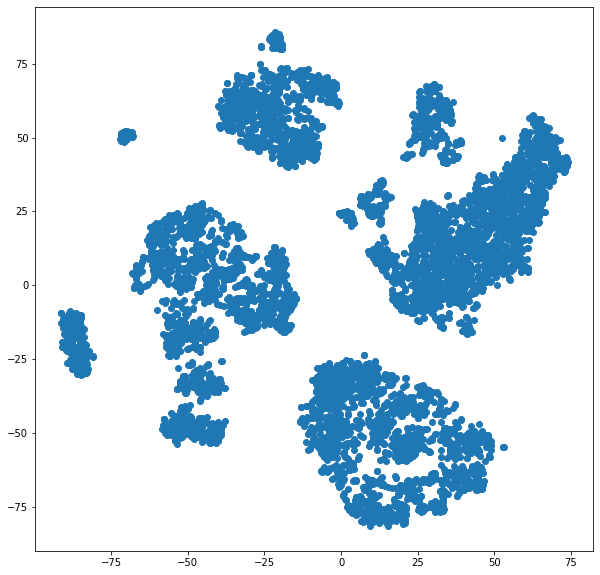

In [74]:
x_axis=model[:,0]
y_axis=model[:,1]

plt.figure(figsize = (10,10))
plt.scatter(x_axis, y_axis)
plt.show()

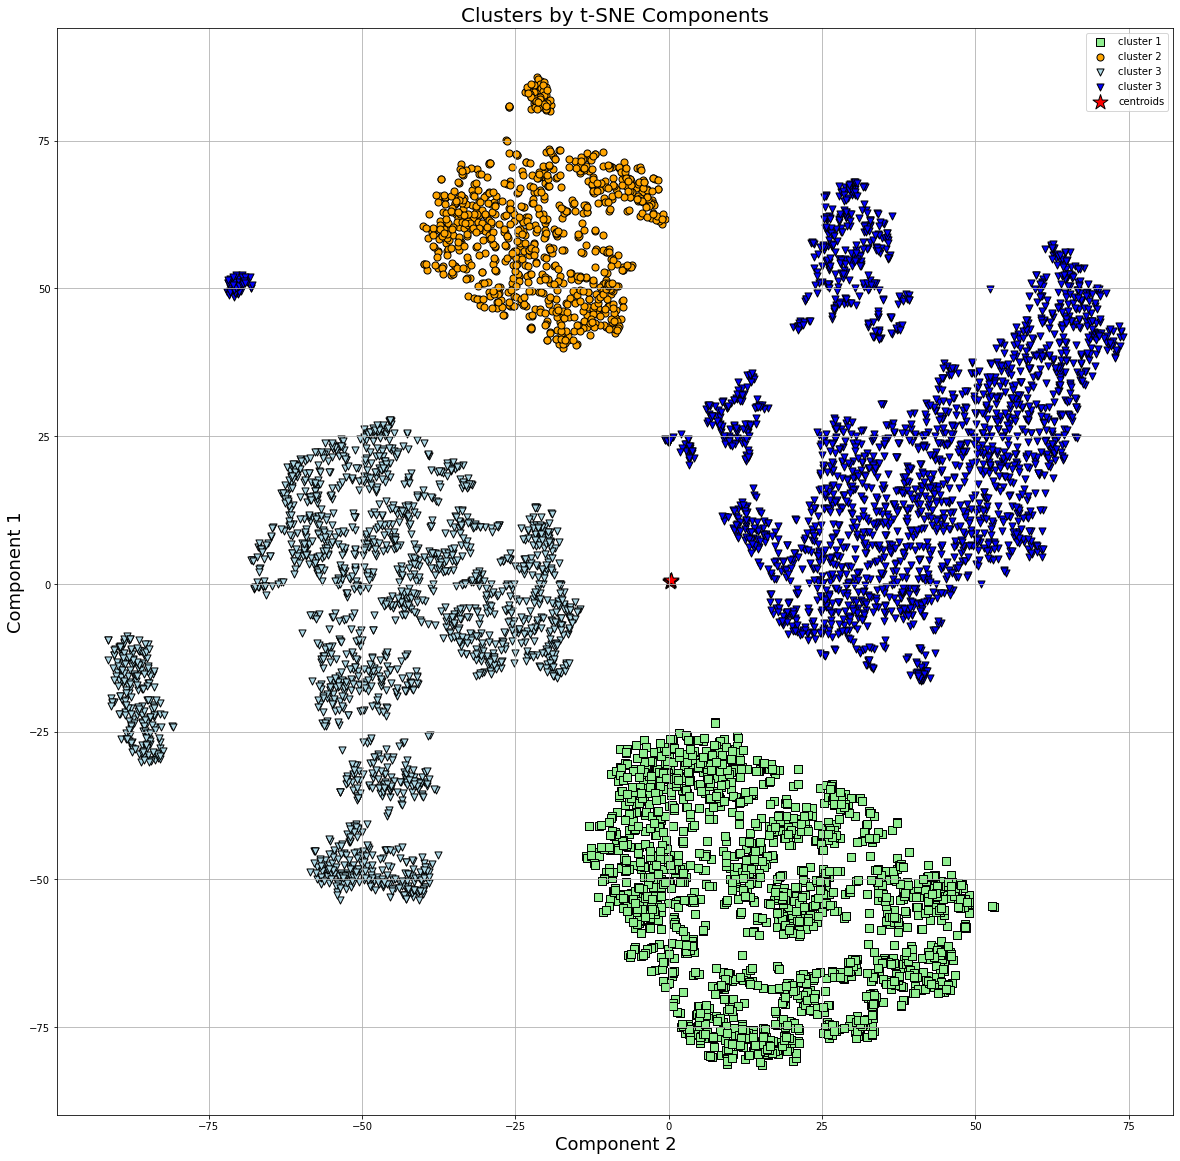

In [75]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[y == 0, 0], model[y == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[y == 1, 0], model[y == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[y == 2, 0], model[y == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[y == 3, 0], model[y == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.title('Clusters by t-SNE Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()

Other = 3, Biophony = 2, Anthrophony = 1 (completely missed the mark on this), Geophony = 0

In [1]:
from sklearn import metrics
import pandas as pd
kmeans_data_old = pd.read_csv('kmeans_results.csv', header='infer')
kmeans_data_new = pd.read_csv('kmeans-nodr.csv', header='infer')

labels_pred = kmeans_data_new['Cluster']


#encoding class values
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('other', str(3))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('biophony', str(2))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('geophony', str(0))
kmeans_data_old['class'] = kmeans_data_old['class'].str.replace('anthrophony', str(1))

#print(kmeans_data)

labels_true = kmeans_data_old['class']
metrics.rand_score(labels_true, labels_pred)

0.6959649693947275

In [3]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [4]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

In [6]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}
X = kmeans_data_new
y = labels_true

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 4, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    print(f"Rand-score for {dist_measure} is {round(metrics.rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Rand-score for {dist_measure} is {round(metrics.adjusted_rand_score(y, pyLabels)*100, 2)}%")
    print(f"Adj-Mutual-score for {dist_measure} is {round(metrics.adjusted_mutual_info_score(y, pyLabels)*100, 2)}%")
    print(f"Homogeneity-score for {dist_measure} is {round(metrics.homogeneity_score(y, pyLabels)*100, 2)}%")
    print(f"Completeness-score for {dist_measure} is {round(metrics.completeness_score(y, pyLabels)*100, 2)}%")
    print(f"V-measure-score for {dist_measure} is {round(metrics.v_measure_score(y, pyLabels)*100, 2)}%")
    print(f"Fowlkes-mallows-score for {dist_measure} is {round(metrics.fowlkes_mallows_score(y, pyLabels)*100, 2)}%")
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")
    print(" ")

KeyError: 5102

In [4]:
metrics.adjusted_rand_score(labels_true, labels_pred)

0.251103086079757

In [5]:
metrics.adjusted_mutual_info_score(labels_true, labels_pred)

0.28458579917628063

In [6]:
metrics.homogeneity_score(labels_true, labels_pred)

0.2912251995482547

In [7]:
metrics.completeness_score(labels_true, labels_pred)

0.2789558825133714

In [8]:
metrics.v_measure_score(labels_true, labels_pred)

0.2849585337218734

In [9]:
metrics.fowlkes_mallows_score(labels_true, labels_pred)

0.46299937176320294

In [10]:
df = pd.concat([df, df_paths], axis=1)
df

NameError: name 'df' is not defined

In [ ]:
df.to_csv("kmeans-nodr.csv", index=False)

In [ ]:
df['Cluster'].value_counts()

3    2199
2    1862
0    1679
1     864
Name: Cluster, dtype: int64

In [ ]:
y = kmeans_data_old["kmeans_class"]
y

0       1
1       1
2       1
3       1
4       1
       ..
6599    3
6600    3
6601    3
6602    3
6603    3
Name: kmeans_class, Length: 6604, dtype: object

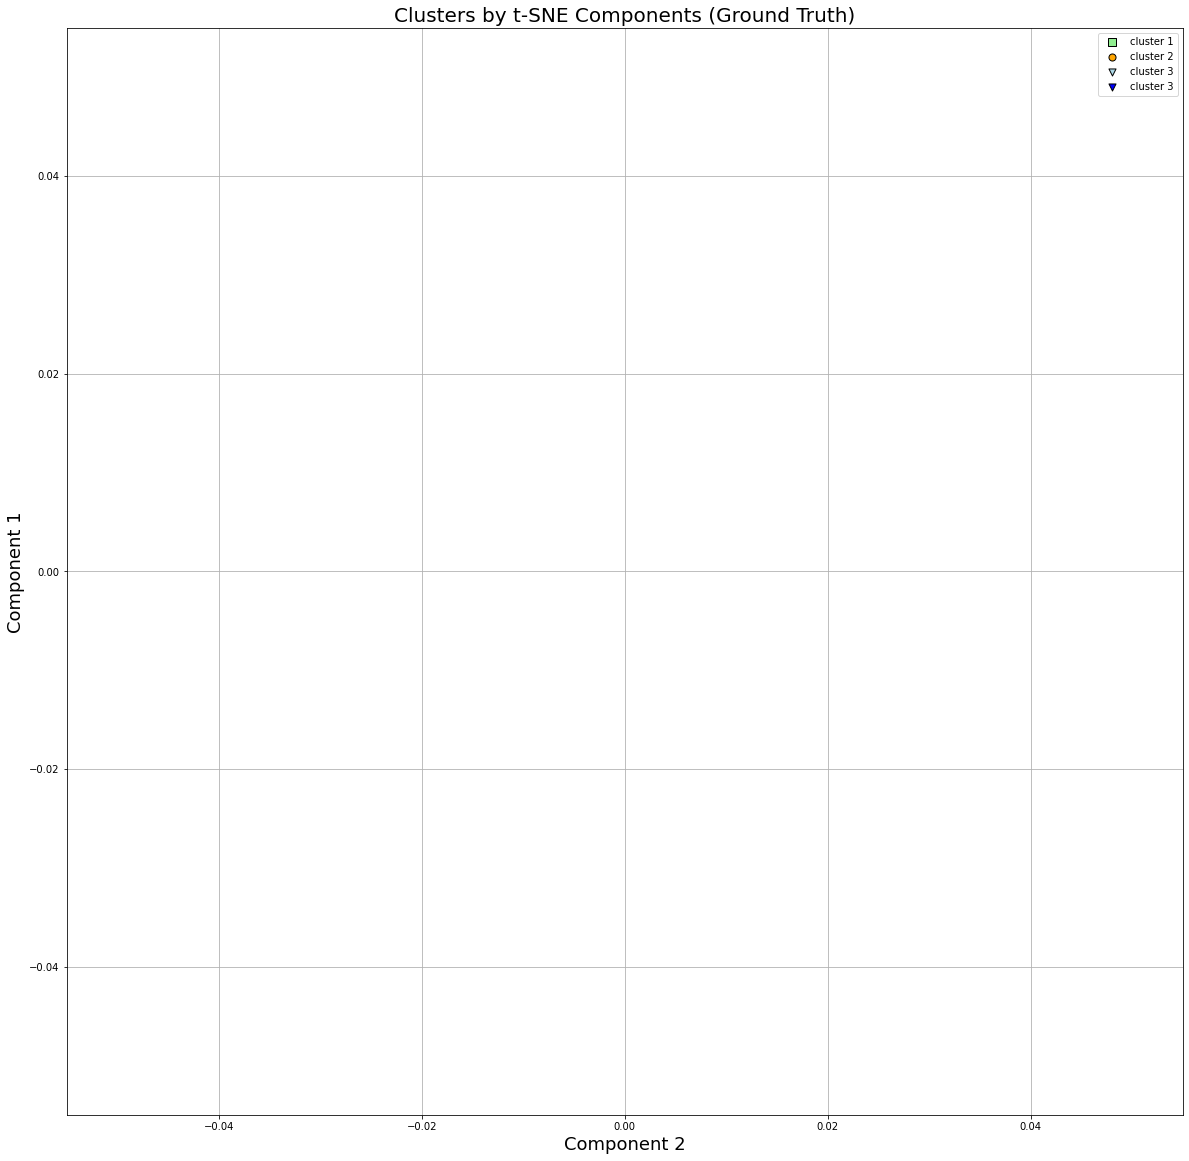

In [ ]:
# plot the 3 clusters
plt.figure(figsize=(20, 20))
plt.scatter(
    model[y == 0, 0], model[y == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    model[y == 1, 0], model[y == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    model[y == 2, 0], model[y == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model[y == 3, 0], model[y == 3, 1],
    s=50, c='blue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.legend(scatterpoints=1)
plt.title('Clusters by t-SNE Components (Ground Truth)', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.grid()
plt.show()